## Convolutional Neural Network - Cats or Dogs

This CNN is built to be trained on thousands of images of cats and dogs for precise classification

### Library Imports

<i>Sequential package is used to initialize our NN. There are to ways to initialize a NN, either a sequence of layers or as a graph and since a CNN is still a sequence of layers we will use Sequential to initialize our CNN</i><br>
<i>We will create the convolution step, in which we will add the convolutional layers. Since images are in two dimensions unlike, for example, videos that are in three dimensions with the time, well, we use this Convolution2D package to deal with images.</i><br>
<i>Next we will add our pooling layers</i><br>
<i>Then we will perform Flattening, in which we convert all the pooled feature maps that we created through Convolution and MaxPooling into this large feature vector that is then becoming the input of our fully connected layers.</i><br>
<i>Dense package is used to add the fully connected layers in a classic ANN</i><br>

In [54]:
# Note this code is only valid if GPU is being used for training

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


### Initializing the CNN

In [3]:
classifier = Sequential()

### Convolution 

* The first argument is the number of filters. So this is exactly the number of feature detectors that we're going to apply on our input image to get this same number of feature maps. So the number of filters that we choose here is the feature maps that we want to create as well because there will be one feature map created for each filter used. So we need to choose this number of feature detectors. This will also have dimensionality, since feature detector is a 2D matrix hence we need to give number of rows and columns.Hence it will have number of feature detectors and dimensions of the feature detectors. Common practice is to use number of feature detectors as 32, 64, 128, 256 etc.. <br>
* Next is the shape of the input image on which you are going to apply your feature detectors through the convolution operation. And that's a very important argument because all our images don't have the same size. They don't have the same format and therefore we need to force them in some way having the same format. That means that we will convert all our images into one same single format and therefore one fixed size of the image and we will do this conversion during the image pre-processing part, right after we build our CNN and just before we fit our CNN to our images. And therefore in this input_shape argument, we need to specify what is the expected format of our input images. That is the format into which our images will be converted. A quick reminder that input images are converted into 3D arrays, if the image is a colored image and into 2D arrays if the image is a black-and-white image. So here since we are working with colored images, well our images will be converted into 3D arrays. So the format which we will use is ( 64, 64, 3 (number of channels, since color)) - because we are using tensorflow backend, if using theano backend, it is just opposite. We are using 64, because we are using CPU and hence making it 64 pixels..If using GPU, we can use 128 or even 256<br>

In [4]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

### Pooling 

Why do we apply this max pooling step? It's because we want to reduce the number of nodes we'll get in the next step, that is the Flattening step and then the Full Connection step because in these next steps basically what we'll get is all the cells of our feature maps, flattened in one huge one-dimensional vector. So, if we don't reduce the size of these feature maps, well we'll get to too large vector and then we'll get too many nodes in the fully connected layers and therefore our model will be highly compute-intensive and we want to avoid this so we're applying this max pooling step to reduce the size of our feature maps and therefore reduce the number of nodes in the feature fully connected layers. And that way this will reduce the complexity and the time execution but without the losing the performance because, by ticking the maximum of these two-by-two sub tables of the feature map, we are in some way keeping the information because we are keeping track of the part of the image, that contained the high numbers corresponding to where the feature detectors, detected some specific features in the input image. So we don't lose the spacial structure information, and therefore we don't lose the performance of the model but at the same time, we managed to reduce the time complexity and we make it less compute-intensive.

In [5]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

### Flattening

Basically this step consists of taking all our Pooled Feature Maps and put them into one single vector. And this single vector is going to be the Input Layer of a future ANN.

Now we can ask ourselves two very important questions. The first question is, why don't we lose the spacial structure by Flattening all these Feature Maps into one same, single vector. And the answer is, that's because by creating our Feature Maps, we extracted the spatial structure informations, by, you know, by getting these high numbers in the Feature Maps, thanks to the Feature Detector that we applied on the Input Image through the Convolution Step. So basically these high numbers represent the spatial structure of our images because these high numbers in the Feature Maps are associated to a specific feature in the input image. And since then, we apply the Max Pooling Step, we keep these high numbers because we take the Max. <br>
And now the second question is,

Why didn't we directly take all the pixels of the Input Image and Flatten them into this one, same, single vector, you know, without applying the previous steps, the Convolution Step and Max Pooling Step? Well, that's because if we directly Flatten the Input Image pixels into this huge, single, one-dimensional vector, then each node of this huge vector will represent one pixel of the Image, independently of the pixels that are around it. So we only get informations of the pixel itself, and we don't get informations of how this pixel is spatially connected to the other pixels around it. So basically, we don't get any information of the spatial structure around this pixel. However, if we apply the Convolution Step and the Max Pooling Step to create all the reduced size Feature Maps, and Flatten all these Feature Maps into this huge, single, one-dimensional vector, then since each Feature Map corresponds to one specific feature of the image, then each node of this huge vector that contains a high number, will represent the information of a specific feature, a specific detail of the Input Image, like for example, the upper left border of a dog nose. And that is because this high number doesn't represent a unique pixel by itself. It represents the study specific feature, that the Feature Detector could extract from the Input Image, through the Convolution Operation. And therefore eventually, we keep the spatial structure information of the Input Image.

In [6]:
classifier.add(Flatten())

### Full Connection

Till now we managed to convert our input image into this one-dimensional vector that contains some informations of the spatial structure or of some pixel patterns in the image and now what we have to do, of course, is to use this input vector as the input layer of a classic artificial neural network because a classic artificial neural network, as we saw it, can be a great classifier for nonlinear problems. And since image classifications is a nonlinear problem, well, it will make a perfect job here to classify the images and tell if each image is the image of a cat or of a dog. So right now, since we already have our input layer, the only thing that we have to do left is to create a hidden layer, that is what we call a fully-connected layer. So we will do that exactly as we did it when we built our classic artificial neural network in the previous section. And then we will need to add the output layer, just composed of one node because this is a binary outcome, cat or dog. And same, we will do it exactly as we did it in the previous section.

<i> For the number of nodes in the hidden layer</i><br>
Remember this choice of numbers results from experimentation and we need to choose a number that is not too small to make the classifier a good model and also not too big to not make it too highly compute-intensive. And therefore we need to experiment. But by experimenting on this outputting parameter, we realize that a number around 100 is a good choice.  We could have picked 100, but it is a common practice to pick a power of two. So we will go with this 128 hidden nodes. <br>

<i>For the output layer </i><br>
To return the probabilities of each class, now it's going to be the sigmoid function. Remember this is the sigmoid function because we have a binary outcome, cats or dog. And if we had an outcome with more than two categories, well, we would need to use the softmax activation function. But here we have a binary outcome, so it's the sigmoid activation function.

In [7]:
# add the hidden layer (fully connected layer)
classifier.add(Dense(activation='relu', units=128))

# add the output layer
classifier.add(Dense(activation='sigmoid', units=1))

#### To Check what we have built so far

FullyConnectedConv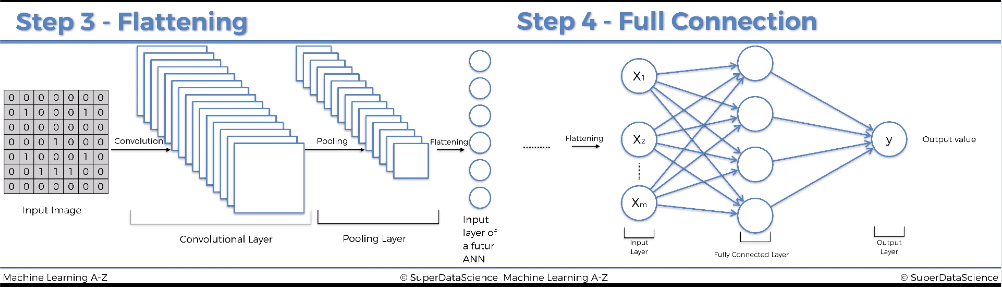

### Compiling the CNN

We use the stochastic gradient optimizer which is adam. For loss function, if we do classification, the loss function can be lograthimic loss and since the outcome is binary, we use the binary_crossentropy

If the outcome is more than two, then use categorical_crossentropy

In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fitting the CNN to the images

#### Image Augmentation
So what is image augmentation, and how will it prevent overfitting? Well, we know that one of the situations that lead to overfitting is when we have few data to train our model. In that situation, our model finds some correlations in the few observations of the training set, but fails to generalize this correlations on some new observations. And when it comes to images, we actually need a lot of images to find and generalize some correlations, because in computer vision, our machine learning model doesn't seem to need to find some correlations between some independent variable and some dependent variables. It needs to find some patterns in the pixels, and to do this it requires a lot of images. Right now, we are working with 10,000 images, 8,000 images on the training set, and that is actually not much to get some great performance results. We either need some more images, or we can use a trick, and that is where data augmentation comes into play. That is the trick, because what it will do, is it will create many batches of our images, and in each batch it will apply some random transformations on a random selection of our images, like rotating them, flipping them, shifting them, or even shearing them, and eventually what we'll get during the training is many more diverse images inside these batches, and therefore a lot more material to train. And now we understand why it is called image augmentation. That's because the amount of our training images is augmented. Besides, because the transformations are random transformations, well our model will never find the same picture across the batches. So all this image augmentation trick can only reduce overfitting. So in summary, image augmentation is a technique that allows us to enrich our data set, our data set, without adding more images and therefore that allows us to get good performance results with littl or not overfitting, even with a small amount of images.



In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_path = 'D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\Cats-Dogs\\training_set'
test_path = 'D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\Cats-Dogs\\test_set'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, 
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='binary')



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
# Fit the classifier model to the training data

classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=25, validation_data=test_set, verbose=1, workers=4, 
                        validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 249s 31ms/step - loss: 0.4653 - accuracy: 0.7729 - val_loss: 0.5286 - val_accuracy: 0.7410
Epoch 2/25
8000/8000 [==============================] - 242s 30ms/step - loss: 0.3164 - accuracy: 0.8599 - val_loss: 1.1420 - val_accuracy: 0.7486
Epoch 3/25
8000/8000 [==============================] - 241s 30ms/step - loss: 0.2276 - accuracy: 0.9048 - val_loss: 0.9252 - val_accuracy: 0.7485
Epoch 4/25
8000/8000 [==============================] - 240s 30ms/step - loss: 0.1774 - accuracy: 0.9292 - val_loss: 1.0436 - val_accuracy: 0.7352
Epoch 5/25
8000/8000 [==============================] - 238s 30ms/step - loss: 0.1389 - accuracy: 0.9469 - val_loss: 0.9322 - val_accuracy: 0.7456
Epoch 6/25
8000/8000 [==============================] - 237s 30ms/step - loss: 0.1159 - accuracy: 0.9563 - val_loss: 1.4979 - val_accuracy: 0.7419
Epoch 7/25
8000/8000 [==============================] - 237s 30ms/step - loss: 0.0981 - accuracy: 0.9638 - val_loss: 0

We see that the validation accuracy is around 73-75% (which is the accuracy on the test set ...). In order to increase
the accuracy, we can
* Add another convolution layer (And/OR)
* Add hidden layers to the Deep Neural networs

We will try adding another convolutional layer, to see whether the accuracy increases.

In [55]:
### Improve the accuracy by adding a Second Convolutional Layer

# This time putting the whole code together

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from datetime import datetime

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# This is the second CONV layer and it will be applied on the pooled feature map and hence input_shape param is not needed
classifier.add(Conv2D(32, (3, 3), activation='relu')) 
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

# add the hidden layer (fully connected layer)
classifier.add(Dense(activation='relu', units=128))

# add the output layer
classifier.add(Dense(activation='sigmoid', units=1))

# compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_path = 'D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\Cats-Dogs\\training_set'
test_path = 'D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\Cats-Dogs\\test_set'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, 
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='binary')

start = datetime.now()
classifier.fit_generator(training_set, steps_per_epoch=8000, epochs=25, validation_data=test_set, verbose=1, workers=6, 
                         validation_steps=2000)
end = datetime.now()

print("Time Taken to Complete the training :", (end-start))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
8000/8000 [==============================] - 289s 36ms/step - loss: 0.3559 - accuracy: 0.8336 - val_loss: 0.5669 - val_accuracy: 0.8141
Epoch 2/25
8000/8000 [==============================] - 288s 36ms/step - loss: 0.1123 - accuracy: 0.9570 - val_loss: 0.7015 - val_accuracy: 0.8230
Epoch 3/25
8000/8000 [==============================] - 288s 36ms/step - loss: 0.0577 - accuracy: 0.9788 - val_loss: 0.9185 - val_accuracy: 0.8142
Epoch 4/25
8000/8000 [==============================] - 288s 36ms/step - loss: 0.0408 - accuracy: 0.9854 - val_loss: 1.1014 - val_accuracy: 0.8097.98 - ETA: 0s - loss: 0.0
Epoch 5/25
8000/8000 [==============================] - 288s 36ms/step - loss: 0.0329 - accuracy: 0.9888 - val_loss: 1.1055 - val_accuracy: 0.8170
Epoch 6/25
8000/8000 [==============================] - 289s 36ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 1.1831 - val_accuracy: 0.8210
Epoch 7/2

In [56]:
# Now lets see the average accuracies on the training and test dataset

print("Average Accuracy on training dataset")
print(np.mean(classifier.history.history['accuracy']))
print("Average Accuracy on the test dataset")
print(np.mean(classifier.history.history['val_accuracy']))

Average Accuracy on training dataset
0.9863079
Average Accuracy on the test dataset
0.8127155


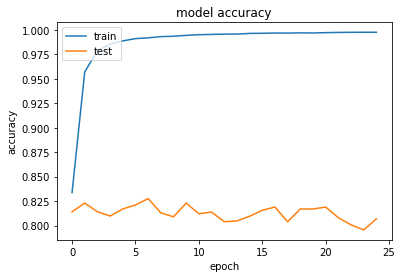

In [57]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

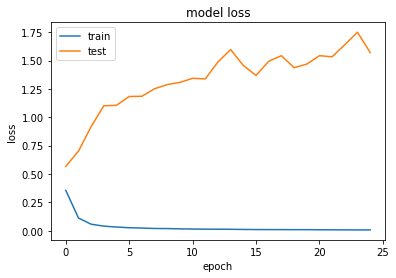

In [58]:
# Summarize history for loss
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Now we will use this CNN model to predict whether an image is Dog or Cat .. A real image test

In [47]:
# Necessary Library imports

import numpy as np
from tensorflow.keras.preprocessing import image

In [59]:
# Now we will load the image. The First argument is the path of the image and the second argument is the image size which
# should be exact same dimensions that were used for the training

test_image_1 = "D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\Cats-Dogs\\single_prediction\\cat_or_dog_1.jpg"
test_image_2 = "D:\\ML-Datasets\\Udemy-DeepLearning\\CNNDatasets\\Cats-Dogs\\single_prediction\\cat_or_dog_2.jpg"

test_image_1 = image.load_img(test_image_1, target_size=(64, 64))
test_image_2 = image.load_img(test_image_2, target_size=(64, 64))

# Now we will convert this image to image array of three channels (three dimensional), because its a color image
test_image_1 = image.img_to_array(test_image_1)
test_image_2 = image.img_to_array(test_image_2)

now what we have to do is add a new dimension to our test image, and to do this we're gonna use the expand dims function that will add this dimension. We're just doing this to give what the predict method expects, and for those of you curious to know what this dimension corresponds to, well, it corresponds to the batch because, in general, the functions of neural networks, like the predict function, cannot accept a single input by itself, like the image we have here. It only accepts inputs in a batch. Even if the batch contains one input, the input must be in the batch, and this new dimension that we are creating right now corresponds to the batch. The batch that will contain the input, whether there is one input or several inputs. So here, we will have one batch of one input, but then in general, we can have several batches of several inputs, and we can apply the predict method on that. So for example, if for this new dimension we had two elements, that means that we would have two batches containing single or several inputs.

In [60]:
# to add this new dimension, we use numpy
test_image_1 = np.expand_dims(test_image_1, axis = 0)
test_image_2 = np.expand_dims(test_image_2, axis = 0)

# Check the newly added dimension
print("Shape of image_1 :",test_image_1.shape)
print("Shape of image_2 :",test_image_2.shape)

Shape of image_1 : (1, 64, 64, 3)
Shape of image_2 : (1, 64, 64, 3)


In [74]:
# Now to get the class associated with this prediction
print(training_set.class_indices)

# Now we will pass this to our classifier to predict
prediction_image_1 = classifier.predict(test_image_1)
prediction_image_2 = classifier.predict(test_image_2)

def whatAnimal(pred):
    if pred[0][0] == 1:
        print("The image is a Dog")
    else:
        print("The image is a Cat")
        
whatAnimal(prediction_image_1)
whatAnimal(prediction_image_2)

{'cats': 0, 'dogs': 1}
The image is a Dog
The image is a Cat
